<!-- dom:TITLE: Automatic for the people -->
# Automatic for the people
**MOD510: Mandatory project 1**  
**Deadline: 16. September 2024 (23:59)**
Date: **Sept. 4, 2024**

Authors:  
*Dea Lana Asri*  
*Sander Øydal Sterri*  
*Urszula Maria Starowicz*  

**Abstract** 

Numerical errors, such as round-off and truncation errors, must always be considered when doing numerical calculations in Python. Apart from discussing how to deal with these errors, different NumPy functions are explored to give a deeper understanding of how calculations can be simplified and sped up compared to lists. A focus is also placed on writing clean code, by introducing functions and classes and how to implement numerical algorithms such as 'FancyWavePacket'. FancyWavePacket is a class which contains several functions that calculate the analytical derivative, forward difference, central difference and plots the result, such as the absolute error between the numerical and analytical solution. Automatic differentation, on the other hand, is an alternative method of evaluating a derivative by creating a 'Duple Class' containing sets of basic operations such as: addition, subtraction, multiplication and division. 

<!-- The numerical errors, such as round-off and truncation errors, must always be considered when working with Python programming language. Apart from discussing ways how to deal with them, there will be also touched the issue of efficiency by using NumPy arrays instead of list and writing a clean code. That is coming down to execises explaining usages of classes in code and their implementations of numerical algorithms such as FancyWavePacket. FancyWavePacket class contains of several function that calculate the analytical derivative, forward difference, central difference and plot the results. Finally, trying out the posiblities of object oriented programming used to evaluate derivative using Automatic Differentiation method by creating Duple Class containing sets of basic operations (addition, substraction, multiplication, and division). -->


**Introduction**

This notebook begins with a short recollection of computations equations used in computers. According to the IEEE 754-1985 standard, most important parameters were provided with definitions. Moreover, the required ones were deeply explained and included with the equations and code snippet for a better understanding of the issue, which is round-off errors and truncation errors that may occur using Python language. This is discussed and clarified later on with examples of addition and comparison of two float numbers.  

The second exercise of this project is focused on the Python library NumPy, which is widely used for many simple and complex calculations. Firstly, the task's topic was about the differences between using computation functions on NumPy arrays and innate Python lists. Having run the same code for np.arrays and lists, occurring errors were explained and corrected for each one. Knowing the characteristics of both, in the next step basic and more advanced functionalities of the NumPy array were explored and practiced. Thanks to them, the authors were familiarised with:  
* creating boolean masks,  
* setting criteria for filtering values,  
* understanding and using logic in comparing np.arrays.  
  
Exercise 3 is devided into two topics. Part I is all about derivatives. In this exercise, the objective is to calculate the derivative of a function both analytically and numerically. This is done by using python functions. The solutions can be used to calculate the error as well as the step size 'h' which correlates to the lowest error. Lastly, by making a scatter plot, the absolute error against the step size 'h' can be visualized.  

Part II of the 3rd exercise is about classes. In this exercise, the goal is to create a class with functions that use the forward/central difference method to calculate the numerical solutions. The numerical solutions can then be compared to the analytical solution to find the absolute error and the step size 'h' which correlates to the smallest error. Lastly, as in part I, the absolute error against the step size 'h' can be visualized by creating a scatter plot.
  
The end of the project is about challenges occuring when calculating the derivation of a function with numerical differentiation. They can cause the code to be slow and inaccurate due to round-off errors. Wengert, in 1964 [[Wengert, 1964]](#wengert1964simple), proposed a technique called Automatic Differentiation (AD). The calculation of the given "complex" expression is decomposed using the chain rule, and the derivative is calculated by evaluating the expression and its derivative at the same time. The main feature of this approch is the simplicity it offers.

For example, to compute $f'$ where
\begin{equation*}
f = \frac{x_1}{x_2^2 x_3}
\end{equation*}
using AD, first the function should be decomposed into elementary operations of power, multiplication, and division. By doing these subroutines, the derivative of function $f$ can be calculated indirectly. The higher order functions are also treated in the exactly same manner.

To implement AD in python, we use a vector of size 2 to store the function value and its derivative. The vector is defined as:


$$\begin{pmatrix}
f(x) \\ f^\prime(x)
\end{pmatrix}\hspace{35pt}\text{(10)}$$

Then, using object oriented programming for the class of vector above, sets of fixed operations (addition, substraction, multiplication, and division) is applied. Combining it with elementary functions such as $\sin, \log, \exp$, the derivative of any complex functions could be evaluated.

In [1]:
#Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt

<!-- ======= Introduction   ======= -->



# Exercise 1: Finite-precision arithmetic
<div id="ex:round_err"></div>

**Part 1.**

Run the following code snippet:

In [2]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

* Explain the meaning of the numbers that are printed out.

Hint: Read the lecture material on the IEEE Standard for floating-point arithmetic.
 

sys.float_inf describes the float representation in the system based on IEEE 754-1985 standard. According to the [Python Documentation of sys](https://docs.python.org/3/library/sys.html), the following attributes are defined:


|    Parameter    |    Description    |
|:---------------|:------------------|
| **max**         | Highest positive finite number that can be represented by the system        |
| **max_exp**     | Maximum exponent in binary basis that can be represented by the system      |
| **max_10_exp**  | Maximum exponent in 10-digit basis that can be represented by the system    |
| **min_exp**     | Minimum exponent in binary basis that can be represented by the system      |
| **min_10_exp**  | Minimum exponent in 10-digit basis that can be represented by the system    |
| **dig**         | Maximum number of decimal digits that can be represented                    |
| **mant_dig**    | Mantissa digit, or the float precision                                      |
| **epsilon**     | Least value, so that $1.0 + \epsilon$ is not representable as a float 1.0   |
| **radix**       | The radix of exponent representation                                        |
| **rounds**      | Integer that represents the rounding mode for float, rounds=1 means that <br> the rounding-off for the float in the system is "to the nearest" |



**Part 2.**

* Show how you can calculate the printed-out values `max`, `min`, `epsilon` yourself (again, based on the IEEE standard).

Based on the IEEE 754-1985 standard, the float representation in a 64-bit system consists of 1 bit for the sign, 11 bits for the exponent, and 52 bits for the fraction. The exponent can be positive to represent a value greater than 1 or negative to represent a value less than 1.  
According to Hiorth [[4]](#hiorth), the calculation of Maximum, Minimum and Epsilon can be calculated by using float representation denoted as:

$$ \pm q \times 2^{E - e} $$

The number of bias, \( e \), is fixed. In a 64-bit system, \( e = 1023 \).

The value of the exponent is represented by 11 bits, so it can take values from \( 0 \) to \( 2^{11} - 1 = 2047 \). The values \( E = 0 \) and \( E = 2047 \) are reserved for special numbers, which are negative infinity and infinity, respectively.

---

**Calculate Maximum Value:**

The maximum value is when all the bits in the fraction are 1s, so:

$$ 1.1111\ldots \text{(52 ones)} \times 2^{1023} $$

This equals:

$$ (2 - 2^{-52}) \times 2^{1023} = (2^{1024} - 2^{971}) $$

Thus, the maximum value is approximately:

$$ 1.7976931348623157 \times 10^{308} $$

---

**Calculate Minimum Value:**

The minimum normalized positive value occurs when the exponent is at its smallest (1) and the fraction is all 0s:

$$ 1.0000\ldots \times 2^{-1022} = 2^{-1022} $$

Thus, the minimum normalized value is:

$$ 2.2250738585072014 \times 10^{-308} $$

---

**Calculate Epsilon:**

Epsilon is the smallest value that, when added to 1, produces a result different from 1 in the floating-point system. It is defined as:

$$ \epsilon = 2^{-52} \times 2^0 = 2^{-52} $$

Thus, the value of epsilon is approximately:

$$ 2.220446049250313 \times 10^{-16} $$


In [3]:
max_value = (2 - 2**-52) * 2**1023
print(f"Calculated max value: {max_value}")
min_value = 2**-1022
print(f"Calculated min value: {min_value}")
epsilon_value = 2**-52
print(f"Calculated epsilon value: {epsilon_value}")

Calculated max value: 1.7976931348623157e+308
Calculated min value: 2.2250738585072014e-308
Calculated epsilon value: 2.220446049250313e-16


**Part 3.**

In Python, typing `0.1+0.2` does not (typically) produce the same output as `0.3`.

* Why not?

Because the computer can not represent float 0.2 exactly. Rather it represent something close to 0.2. Hence, 0.1+0.2 is not the same as 0.3.

**Part 4.**

* Would you use the `==`-operator to test whether two floating-point numbers are equal?

No, because of the floating point representation. As explained in Part 3, since 0.1+0.2 is not equal to 0.3, it's not a good idea to use the '$==$' operator to check whether two floating-point numbers are equal.  

* Why / why not? Can you think of alternative ways to do floating-point number comparison?  

Because of rounding off errors, it's better to check whether $|a-b| < \epsilon$. If $|a-b| < \epsilon$ and $\epsilon$ has a low value, then $a ≈ b$.





# Exercise 2: Get up to speed with NumPy
<div id="exer:numpy"></div>

The purpose of this exercise is to learn a little bit about
[NumPy](https://numpy.org/), which is an incredibly useful Python library.
A major reason for its popularity is efficiency: doing computations with NumPy
arrays (objects of the type `ndarray`) instead of using native Python lists (vanilla Python) can,
by itself, speed up a program by several orders of magnitude!
The mechanism for speed-up is [vectorized computation](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html).

**Vectorized functions.**

Using NumPy arrays allows you to create vectorized functions; functions that
operate on a whole array at once, rather than looping over the elements
one-by-one inside a custom written loop.

The way vectorization works behind the scenes is still via loops
(optimized, pre-compiled C code), but as Python programmer you do not need
to worry about the details.



**Part 1.**

The following code block gives an example of a vectorized function:

In [4]:
x = np.linspace(0, 1, 10)
np.exp(x)  # Apply f(t)=exp(t) to each element in the array x.
np.exp(-x)  # Apply the function f(t)=exp(-t) to each element of x.

array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
       0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944])

Notice the usage of `np.exp` instead of using the exponential function provided
in the built-in [math](https://docs.python.org/3/library/math.html)
library; this is an example of a
[universal function](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).

* Create a native Python list of the same size as `x` and holding the same values. Apply the same two function calls to this list, i.e. `np.exp(x)` and `np.exp(-x)`. Explain what happens.



In [5]:
x_list = list(np.linspace(0, 1, 10))
print(x_list)
print(np.exp(x_list))

# np.exp(-x_list)

[np.float64(0.0), np.float64(0.1111111111111111), np.float64(0.2222222222222222), np.float64(0.3333333333333333), np.float64(0.4444444444444444), np.float64(0.5555555555555556), np.float64(0.6666666666666666), np.float64(0.7777777777777777), np.float64(0.8888888888888888), np.float64(1.0)]
[1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]


This line: *np.exp(-x_list)* gives back this error:  
TypeError                     Traceback (most recent call last)  
Cell In[6], line 4  
      2 print(x_list)  
      3 np.exp(x_list)  
----> 4 np.exp(-x_list)  

TypeError: bad operand type for unary -: 'list'

* How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)

After using '-' directly with python lists, that are meant to be containers - not vectors, we got TypeError. This happened because python does not support mathematical operations on lists, because lists, contrary to NumPy arrays, are not designed for numerical computations.
To change every value to a negative in the list, it has to be done in iterations for every element in the list.

In [6]:
x_list_minus = [-i for i in x_list]
np.exp(x_list_minus)

array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
       0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944])

**Part 2.**

As already hinted at, the NumPy library comes with a plethora of useful
features and functions. The code snippets below show some examples:

* Explain what each line of code does.

* How would you produce the same output using native Python lists?

In [7]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

It creats NumPy array with twenty numers 0. It can be done in native python lists this way:

In [8]:
zeros_list = [0] * 20
print(zeros_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
np.ones(20)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

This function creat NumPy array with twenty numbers 1. To do it using python lists you can use for loop:

In [10]:
ones_list = [1 for _ in range(20)]
print(ones_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

This line create numpy array with minimum value/starting point at 0 and ends at 10 and consist 11 elements. Space between 0 an 10 is split equaly in 11 values.

In [12]:
start = 0
stop = 10
num = 11
step = (stop - start) / (num - 1)
Lin_list = [start + i * step for i in range(num)]
print(Lin_list)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [13]:
np.linspace(0, 10, 11, endpoint=False)

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

It creates a NumPy array with 11 evenly spaced values starting from 0 up to but without 10 - end point. To do it using lists, this code can be used:

In [14]:
start = 0
stop = 10
num = 11
step = (stop - start) / num
Lin_list_without_end = [start + i * step for i in range(num)]
print(Lin_list_without_end)

[0.0, 0.9090909090909091, 1.8181818181818181, 2.727272727272727, 3.6363636363636362, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.2727272727272725, 8.181818181818182, 9.09090909090909]


In [15]:
vector = np.arange(5) + 1
2*vector


array([ 2,  4,  6,  8, 10])

* np.arange(5) - creats a NumPy array of integers from 0 to 4.
* np.arange(5) + 1 - adds 1 to each element in the array.
* 2 * (np.arange(5) + 1) - multiplies each element in the array by 2  
To do the same using lists, you can use this code:

In [16]:
vector_l = [i + 1 for i in range(5)]
result = [2 * x for x in vector_l]
print(result)

[2, 4, 6, 8, 10]


**Part 3.**

Frequently you will want to extract a subset of values from an array based
on some kind of criterion. For example, you might want to count the number
of non-zero numbers, or identify all values exceeding a certain threshold.
With NumPy, suchs tasks are easily achieved using
[boolean masking](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html), e.g.:

In [17]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


However, neither of the following codes lines will execute:

In [18]:
# is_even_and_greater_than_17 = is_even and is_greater_than_17
# print(array_of_numbers % 2 == 0 & array_of_numbers > 17)

Code above gives back this error:

ValueError                    Traceback (most recent call last)  
Cell In[18], line 1  
----> 1 is_even_and_greater_than_17 = is_even and is_greater_than_17  
    2 print(array_of_numbers % 2 == 0 & array_of_numbers > 17)  

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()  

* Explain why this code fails.

* Use [`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html) to make the code work 

'And' is used for logical operations between single boolean values, not operations between NumPy arrays. Since NumPy arrays are not single boolean values, this results in a ValueError.  

Due to operator precedence, code works this way: *array_of_numbers % (2 == 0) & array_of_numbers > 17*. And statement 2==0 will give *false* value, which is in Python 0, so we will get *array_of_numbers % 0*. This operation is problematic because division by zero is undefined and will either result in an error or unexpected behavior.  

To fix these issues, we can use np.logical_and as shown below:

In [19]:
is_even_and_greater_than_17 = np.logical_and(is_even, is_greater_than_17)
print(is_even_and_greater_than_17)
print(np.logical_and(array_of_numbers % 2 == 0, array_of_numbers > 17))

[False False False False False  True False False]
[False False False False False  True False False]


**Part 4.**

The function [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)
can also be used to select elements from an array.

* Explain the output of the following two lines of code:

In [20]:
np.where(array_of_numbers > 17)[0]

array([4, 5])

*array_of_numbers > 17* - will create vector of boolean values with true in places where number is bigger than 17  
*np.where* - will show id in vector of true values  
*dtype=int64* - shows that the data type of the elements in the array are 64-bit integers

In [21]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

*np.where(condition, x, y)*  
* x - what to insert in true values
* y - what to insert in false values  
So in this code we are asserting true values for numbers in vector bigger than 17 and then changes true values for 1 and false for 0.

# Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions.
For problems encountered in practice, exact formulas may not be available,
in which case numerical estimates are needed. However, to evaluate the
correctness of our programmed numerical methods, it is still a very good idea
to test the code on simple functions where the derivative is known.

In this exercise, we consider a function that is relevant for describing wave
phenomena:

$$f(x) = \sin(bx)\cdot e^{-ax^2}\hspace{35pt}\text{(1)}$$

One way to implement the [function in Python](https://realpython.com/defining-your-own-python-function/) is:

In [22]:
def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

We have chosen to define `a` and `b` as *default arguments*, which allows us to evaluate the function at $x=1$ by simply typing `f(1)`;
this is equivalent to the command `f(1, 0.1, 10)`. If you want to change the `b` parameter, you can do, e.g., `f(1, b=2)`.
Note also that the function works both when `x` is a single number *and* when it is a Numpy array. This is because we use the Numpy versions of the sine (`np.sin`) and exponential (`np.exp`) functions.

**Python functions are first-class!**

An important feature of Python is that functions are
[first-class objects](https://en.wikipedia.org/wiki/First-class_function),
meaning that you can assign them to variables, you can store them inside
various containers and data structures, they can be passed as input arguments
to other functions, and they may be return values of other functions.



We will exploit this property of Python several times during this project.

**Part 1.**

It is always a good idea to start by visualizing the function in a plot.

* Make a Python function that plots $f(x)$ from equation ([1](#eq:p1:f)) over an arbitrary closed interval.

* Use the function to plot $f(x)$ in the range $[-10,10]$. Try to make your figure similar to the one shown in [figure 1](#fig:p1:wave)

<!-- dom:FIGURE: [fig-project1/wave.png, frac=1.0] A plot of $f(x)$. <div id="fig:p1:wave"></div> -->
<!-- begin figure -->
<div id="fig:p1:wave"></div>

<img src="./fig-project1/wave.png" ><p style="font-size: 0.9em"><i>Figure 1: A plot of $f(x)$.</i></p>
<!-- end figure -->


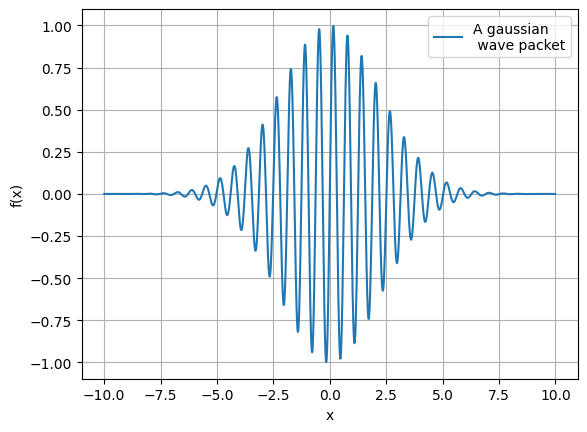

In [23]:
def plot_f(function, min, max, h=0.01):
    """Plot the function f in the interval [min, max]."""
    x = np.arange(min, max, h)
    y = function(x)
    fig = plt.figure()
    plt.plot(x, y)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['A gaussian\n wave packet'])

plot_f(f, -10, 10)
    

The figure above display the plot of $f(x)$ in the range $[-10, 10]$


**Part 2.**

The analytical derivative of $f(x)$ is

$$f^\prime(x) =b \cos(bx)\cdot e^{-ax^2} - 2ax\sin(bx)\cdot e^{-ax^2}\hspace{35pt}\text{(2)}$$

* Write a Python function that calculates the derivative defined in equation ([2](#eq:p1:ana)) (*not* the numerical derivative)


In [24]:
def analytical_derivative(x, a=0.1, b=10):
    return (b*np.cos(b*x) - 2*a*x*np.sin(b*x))*np.exp(-a*x*x)

**Part 3.**

Next, you are going to write a Python function that calculates the numerical
derivative of an *arbitrary* single-variable function `f` at a point $x$
using finite differences.

* Write a Python function that calculates the derivative of an arbitrary function using the *forward difference* method (see section 3.3 in [[Hiorth, 2024]](#hiorth) ).

* Apply your function to the particular case of equation ([1](#eq:p1:f)) and $x=1$. Use a suitable value of $h$, e.g. $h=1e-2$, and check that your estimate agrees reasonably well with the *analytical solution*.

Hint: Check out some tips in Appendix A, we would recommend to use the [args](https://realpython.com/python-kwargs-and-args/) possibility in Python to write a numerical derivative function. See also section 1.3.4 in [[Hiorth, 2024]](#hiorth).


In [25]:
def forward_difference(func, x, h=1E-2, *args):
    return (func(x + h) - func(x))/h

numerical_resutl = forward_difference(f, 1)
analytical_result = analytical_derivative(1)
print(f'Numerical result with Forward Difference: {numerical_resutl}')
print(f'Analytical result: {analytical_result}')
print(f'Absolute error of Forward Difference: {np.abs(numerical_resutl-analytical_result)}')

Numerical result with Forward Difference: -7.220096595246589
Analytical result: -7.493783027703379
Absolute error of Forward Difference: 0.27368643245679003


It is shown from the code in the cell aboce that the numerical derivative with forward difference of the function $f(x)$ at $x=1$ is $-7.220096$ and the analytical derivative is $-7.493783$. As the error is $0.273687$, the numerical derivative is in good agreement with the analytical solution.

**Part 4.**

* Write another Python function that calculates $f^{\prime}(x)$ with the *central difference* method (see section 3.4 in [[Hiorth, 2024]](#hiorth)).


In [26]:
def central_difference(func, x, h=1E-2, *args):
    return (func(x + h) - func(x - h))*0.5/h

print(f'Analytical result: {analytical_result}')
print(f'Numerical result with Central difference: {central_difference(f, 1)}')
print(f'Absolute error of Central Difference: {np.abs(central_difference(f,1)-analytical_result)}')

Analytical result: -7.493783027703379
Numerical result with Central difference: -7.481567749530806
Absolute error of Central Difference: 0.012215278172572397


It is shown from the code in the cell aboce that the numerical derivative with central difference of the function $f(x)$ at $x=1$ is $-7.481568$ and the analytical derivative is $-7.493783$. As the error is $0.012215$, the numerical derivative with central difference is in good agreement with the analytical solution.

**Part 5.**

Next, we wish to quantify the error in our numerical derivative approximations for the point $x=1$.

* For each of the two derivative approximations to $f^{\prime}(1)$ (forward difference and central difference), make a scatter plot that shows the *absolute error* of the approximation on the $y$-axis versus the step size, $h$, on the $x$-axis. Include both error curves in the same figure. The step sizes should be varied logarithmically between $h=10^{-16}$ and $h=10^0=1$.

* Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical analysis using Taylor's formula?


Text(0, 0.5, 'Numerical Error')

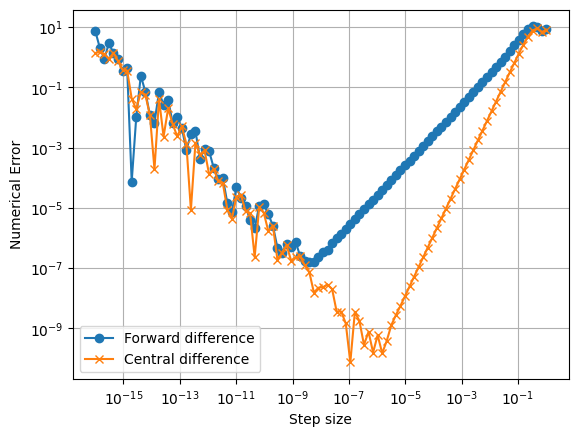

In [27]:
fig = plt.figure()
step = np.logspace(-16, 0, 100)
x = 1
error_forward = [abs(forward_difference(f, x, h) - analytical_derivative(x)) for h in step]
error_central = [abs(central_difference(f, x, h) - analytical_derivative(x)) for h in step]
plt.plot(step, error_forward, '-o', label='Forward difference')
plt.plot(step, error_central, '-x', label='Central difference')

plt.grid()
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size')
plt.ylabel('Numerical Error')

The above figure visualizes absolute error for both forward difference and central difference method to differentiate equation ([1](#eq:p1:f)) and $x=1$

In [28]:
#return the step size that make the error smallest based on numerical calculation
print(f'Step size that make the error smallest in forward difference method is: {step[error_forward.index(min(error_forward))]}, which makes the error: {min(error_forward)}')   
print(f'Step size that make the error smallest for central difference method is {step[error_central.index(min(error_central))]}, which makes the error: {min(error_central)}')

Step size that make the error smallest in forward difference method is: 5.72236765935022e-09, which makes the error: 1.560801212718843e-07
Step size that make the error smallest for central difference method is 1.1233240329780311e-07, which makes the error: 7.446043781556e-11


In [29]:
#Calculating the error using Taylor's series
step_size_forward = 2*np.sqrt(np.finfo(float).eps * abs (-0.49/52.34)) 
step_size_central = (6*np.finfo(float).eps * abs(-0.49/733.28))**(1/3)
print(f'Optimal step size for forward difference: {step_size_forward}')
print(f'Optimal step size for central difference: {step_size_central}')

Optimal step size for forward difference: 2.8835752499071992e-09
Optimal step size for central difference: 9.619944622035315e-07


Numerical error is a sum of truncation error and round-off error, while truncation error is proportional to $h$, round-off error is inversely proportional to $h$. Theoritical analysis using Taylor's formula for forward difference and central difference is shown in the equations below. 



**Forward Difference**  
The total error of the forward difference method is given by: 

\begin{equation*}
R_1 = \frac{h}{2} |f''(\eta)| + \frac{2 \epsilon |f(x)|}{h}
\end{equation*}
The step size that minimizes the total error is known by differentiating the $R_1$ with respect to $h$ and put it equal to zero. The optimal step size is given by:

\begin{equation*}
h = 2 \sqrt{\epsilon |\frac{f(x)}{f''(\eta)}|} 
\end{equation*}
The approximation value of $f(1)$ and $f''(1)$ is $-0.49$ and $52.34$ respectively. By inserting those values into the equation above, the optimal step size is $2.88 \cdot 10^{-9}$.

**Central Difference**  
The total error of the central difference method is given by:

\begin{equation*}
R_2 = \frac{h^2}{6} |f'''(\eta)| + \frac{2 \epsilon |f(x)|}{h}
\end{equation*}
By doing the same procedure as above, the optimal step size is given by:
\begin{equation*}
h = \sqrt[3]{6 \epsilon |\frac{f(x)}{f'''(\eta)}|} 
\end{equation*}
By using the approximation value of $f(1)$ and $f'''(1)$, which are $-0.49$ and $733.28$ the optimal step size is $9.62 \cdot 10^{-7}$.

Based on the scatter plot above, the numerical error is the smallest when step size, h, is around $10^{-9}$ for approximation using forward difference and $10^{-7}$ for central difference which is consistent with the theoretical analysis using Taylor's formula.




# Exercise 3, Part II: FD with Classes
<div id="exer:fd_classes"></div>

Implementing numerical algorithms with free functions, as we did in the
previous exercise, is perfectly fine, and you can complete the course by only
coding in this way. However, experience has taught us that it is easy to
introduce unnecessary errors when using this approach. In many cases you
are better off by also using classes, and maybe [object-oriented design](https://realpython.com/python3-object-oriented-programming/).
In this exercise, you will get some practice in coding with classes.
This knowledge will come in handy in later projects, and in any case
it is a good tool to have in your programming toolkit.

Previously, we worked with a function having two input parameters, $a$ and $b$.
Implementing numerical algorithms using free functions was then simple.
However, in a more complicated situation there
could be dozens, or even hundreds, of parameters to keep track of.
Most of these parameters might have fixed values, but frequently you will
want to re-run a model with slightly different parameters than before.
If you are not using classes, it is very easy to use the wrong parameters.
This is especially true when working in a Jupyter notebook, because then it is
possible to run code blocks in any order. If you forget to excute a cell that is
responsible for updating one of your variables, your subsequent calculations
might use incorrect input, and thus end up being wrong!

**Key take-away: Classes provide encapsulation.**

By wrapping parts of your code into classes, and particular realizations of
classes (objects), you facilitate code re-use, and it can make your code
easier to understand and work with, thus reducing the probability of
introducing bugs which may be hard to track down.



## A Crash Course on Classes
<div id="exer:crash_course"></div>

To get started, there are really only a couple of things you need to know.
First, all of your classes should include a special function called `__init__`,
in which you declare the variables (attributes) you wish an instance / object
of the class to keep track of.

Second, when setting, updating, or fetching attributes stored within the class,
you should always use the prefix `self`, followed by a dot.
Furthermore, the functions you define inside the class should have `self` as
the first function argument ([there are exceptions](https://realpython.com/python3-object-oriented-programming/),
but we will not consider that in this project).
All of this is best understood via an example:

In [30]:
class WavePacket:
    """
    A class representation of a wave packet-function.
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def f(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)

    def plot(self, x_min=-10, x_max=10, dx=0.01):
        """
        A simple plotting routine for plotting f(x) in some range.
        """
        x = np.arange(x_min, x_max, dx)
        y = self.f(x)
        fig = plt.figure()
        plt.plot(x, y)
        plt.grid()

Besides the initialization method and a function that calculates $f(x)$ from
equation ([1](#eq:p1:f)), the class includes a simple plotting routine.
A major difference from before is the following: when our function $f(x)$
is defined inside a class, we do not have to pass around $a$ and $b$ as
arguments to the function `f`. Instead, we simply access $a$ and $b$ from
inside the class itself (using the `self`-prefix).
<!--  -->
<!-- both when referring to the variables / attributes, and as the first input -->
<!-- argument to the function. -->

Below is an example of how to use the class:

0.8227663359156917
-0.49225065733419177
Comparison of the values of two functions at the point x=1.


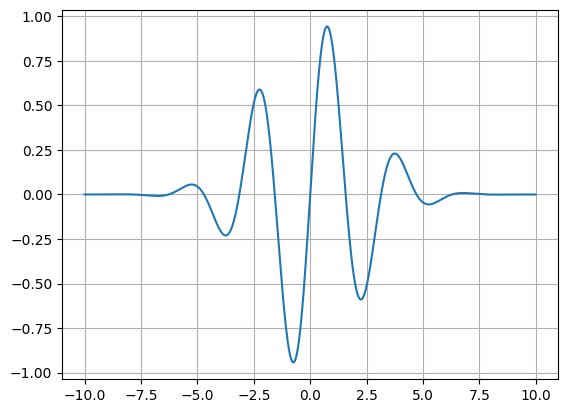

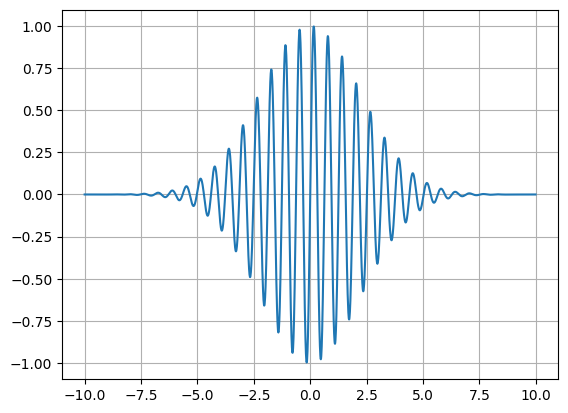

In [31]:
import matplotlib.pyplot as plt
# Create two WavePacket objects, having their own parameter values
WP1 = WavePacket(0.1, 2)  # a=0.1, b=2
WP2 = WavePacket(0.1, 10)  # a = 0.1, b=10

# Evaluate the two functions at a specific point
x = 1
print(WP1.f(x))
print(WP2.f(x))
print('Comparison of the values of two functions at the point x=1.')

# Plot the two functions
WP1.plot()
WP2.plot()

Although we had to write slightly more code, we hope you appreciate
how easy this makes running parallel simulations with different parameters.
Actually, Python provides a way for us to simplify even further, by
defining the special [`__call__`](https://www.realpythonproject.com/python-magic-oop-dunder/)  method for the class:

In [32]:
class FancyWavePacket:
    """
    A slightly more fancy class representation of a wave packet-function.

    In this version, we define the dunder (double-underscore) method __call__,
    which lets us treat objects of the class as if they were real functions!
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def analytical_derivative(self, x):
        """Calculate the analytical derivative of f at x."""
        return (self.b*np.cos(self.b*x) - 2*self.a*x*np.sin(self.b*x))*np.exp(-self.a*x*x)
    
    def forward_difference(self, x, h):
        """Return the forward difference approximation of the derivative of f at x."""
        return (self(x + h) - self(x))/h
    
    def central_difference(self, x, h):
        """Return the central difference approximation of the derivative of f at x."""
        return (self(x + h) - self(x - h))*0.5/h
    
    def plot(self, x, *args):
        """
        Scatter plot of the numerical error of the forward and central difference
        """
        fig = plt.figure()
        step = np.logspace(-16, 0, 100)
        plt.plot(step, [abs(self.forward_difference(x, h) - self.analytical_derivative(x)) for h in step], '-o', label='Forward difference')
        plt.plot(step, [abs(self.central_difference(x, h) - self.analytical_derivative(x)) for h in step], '-x', label='Central difference')

        
        plt.grid()
        plt.legend(loc='best')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Step size')
        plt.ylabel('Numerical Error')
        plt.show()



Compared to the first example of the class, observe that we have replaced the
function `f` by `__call__` (with two underscores on both sides of "call").
This way, we we can write our code *as if FancyWavePacket was a function*:

In [33]:
WP1 = FancyWavePacket(0.1, 2)  # a=0.1, b=2
WP2 = FancyWavePacket(0.1, 10)  # a = 0.1, b=10

# Evaluate the two functions at a specific point
x = 1
print(WP1(x))  # If WP1 had been a function, the syntax would be the same here!
print(WP2(x))  # Again, we no longer have to type "WP2.f(x)", we can do "WP2(x)".
print('Comparison of the values of two fancy wave packet functions at the point x=1.')

0.8227663359156917
-0.49225065733419177
Comparison of the values of two fancy wave packet functions at the point x=1.


**READ THIS BEFORE ANSWERING THE EXERCISES BELOW.**

To avoid code duplication, you should only submit a single version of the
WavePacket class. In other words, while different exercises will ask you to add
a new function to the class, your final delivery should only include the full
class which contains all of the functions.



**Part 1.**

* Add a function ([instance method](https://realpython.com/instance-class-and-static-methods-demystified/)) to the class that returns the forward difference approximation to the derivative of the function `f` at a point `x`. Include both `x` and the step-size `h` as input arguments to the function.

* Add another second function which calculates the central difference approximation.



**Part 2.**

* Make a third class function that, for any input $x$, creates scatter plots showing the absolute error of the two finite difference approximations of $f^{\prime}(x)$ versus step size. As before, choose step sizes in the range from $10^{-16}$ to 1 (with logarithmic spacing). 


Hint: You should re-use the first two functions when making the third one.

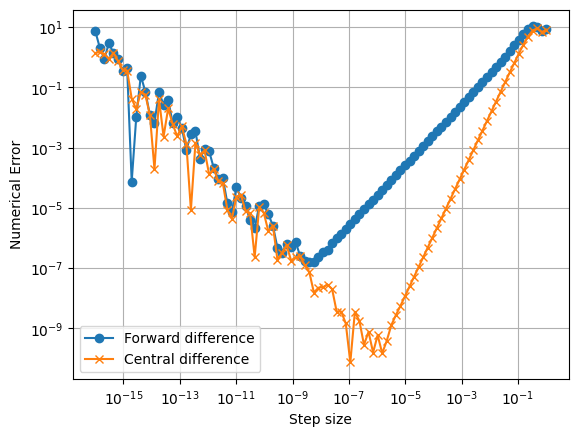

In [34]:
Wave1 = FancyWavePacket(0.1, 10)
Wave1.plot(x=1)

The above figure visualizes absolute error for both forward difference and central difference method to differentiate equation ([1](#eq:p1:f)) and $x=1$ produced using a function inside a class.

In [35]:
print("The value of f'(x) at x=1 using different method of differentiation")
print(f"Forward difference: {Wave1.forward_difference(1, 1E-2)}")
print(f"Central difference: {Wave1.central_difference(1, 1E-2)}")
print(f"Analytical derivative: {Wave1.analytical_derivative(1)}")

The value of f'(x) at x=1 using different method of differentiation
Forward difference: -7.220096595246589
Central difference: -7.481567749530806
Analytical derivative: -7.493783027703379


It is shown from the code in the cell above that the numerical derivative with forward difference, central difference, and the analytical derivative of the function $f(x)$ at $x=1$ is $-7.220096, -7.481568,$ and $-7.493783$ respectively which means the numerical approximation using both methods is doing well compared to the analytical result.

# Exercise 5: Automatic for the people?
<div id="exer:autoder"></div>
* NB! We have chosen this Exercise instead of Exercise 4

## Introduction to automatic differentiation
<!-- 
At the core of computational models, the computer evaluates *gradients*. Gradients may be evaluated using numerical differentiation. Numerical differentiation is usually slow and could be influenced by round off errors. Humans can calculate derivatives of complicated functions using a set of rules. Why cannot the computer do the same, provided of course that we explain the rules? This idea was explored by Wengert in 1964 [[wengert1964simple]](#wengert1964simple). 

The core idea behind automatic differentiation is the fact that when we evaluate a function, it is done by using a set of fixed operations: addition, subtraction, multiplication, division and a set of elementary functions, $\sin, \log, \exp$ etc [[wengert1964simple]](#wengert1964simple).

So how can we tell the algebraic rules of differentiation to the computer? We will do this using Python and object oriented programming. We want to calculate both the function value *and* the derivative at the same time. To achieve this we implement these operations using a vector of size 2 -->




As calculating the derivation of a function with numerical differentiation can be slow and inaccurate due to round-off errors, Wengert in 1964 [[Wengert, 1964]](#wengert1964simple) proposed a technique called Automatic Differentiation (AD). The calculation of the given "complex" expression is decomposed using the chain rule, and the derivative is calculated by evaluating the expression and its derivative at the same time. The main feature of this approch is the simplicity it offers.

For example, to compute $f'$ where
\begin{equation*}
f = \frac{x_1}{x_2^2 x_3}
\end{equation*}
using AD, first the function should be decomposed into elementary operations of power, multiplication, and division. By doing these subroutines, the derivative of function $f$ can be calculated indirectly. The higher order functions are also treated in the exactly same manner.

To implement AD in python, we use a vector of size 2 to store the function value and its derivative. The vector is defined as:


$$\begin{pmatrix}
f(x) \\ f^\prime(x)
\end{pmatrix}\hspace{35pt}\text{(10)}$$

Then, using object oriented programming for the class of vector above, sets of fixed operations (addition, substraction, multiplication, and division) is applied. Combining it with elementary functions such as $\sin, \log, \exp$, the derivative of any complex functions could be evaluated.

In [36]:
class duple:
    '''
    Class for automatic differentiation
    top: function value
    bottom: derivative of function 
    '''
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom

    def __neg__(self):
        """Return the negation of the duple"""
        return duple(-self.top, -self.bottom)
    
    def __add__(self, d): # u+v, u'+v' 
        """Return addition"""
        return duple(self.top + d.top, self.bottom + d.bottom )
    
    def __sub__(self, d): # u-v, u'-v'
        """Return substraction"""
        return duple(self.top - d.top, self.bottom - d.bottom )
    
    def __mul__(self, d):
        """Return multiplication"""
        top = self.top*d.top
        bottom = self.top*d.bottom + self.bottom*d.top
        return duple(top, bottom)
    
    def __truediv__(self, d):
        """Return division"""
        top = self.top/d.top
        bottom = (self.bottom*d.top - self.top*d.bottom)/(d.top**2)
        return duple(top, bottom)
    
    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"

## Addition and substraction
Next, we want to implement some simple operations, lets say we want to do

In [37]:
x=duple(1,2) #f(x)=1, f'(x)=2
y=duple(3,4) #g(x)=3, g'(x)=4
x+y # f(x)+g(x)=4, f'(x)+g'(x)=6

[4,6]

clearly we want to have as output `[4,6]`. If you run the code, Python will give an error message `TypeError: unsupported operand type(s) for +: 'duple' and 'duple'`. This is because `duple` is a class we have defined,  and the `+` operator is not defined for this class. However, in Python you can implement these operations using [*operator overloading*](https://www.geeksforgeeks.org/operator-overloading-in-python/)

it is now possible to run the following code

In [38]:
x=duple(1,2)
y=duple(3,4)
z=x+y
print(z.top, z.bottom)


4 6


to get the expected result. It would also be nice to simply do `print(x+y)` or `x+y` and get the result `[4,6]`, instead of accessing variables by e.g. `z.top`. Fortunately Python has functionality for this, `__repr__` and `__str__`. The `__repr__` and `__str__` is what is produced if you simply write `x+y` or `print(x+y)` in the terminal respectively. 

**Part 1.**
* add the following functions to your class, what happens when you do `x+y`?

In [39]:
def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    
def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"

will allow you to get nice formatted output.

**Part 2.**

In the code above we have implemented `+` operator, however if you try to execute `+x` or `-x`, Python will give an error message `TypeError: bad operand type for unary -: 'duple'`.

* Extend your code to make it possible to perform those operations. (Hint: check out `__neg__` and `__pos__` in the [documentation](https://docs.python.org/3/library/operator.html))

* Implement the `-` operator using `__sub__`, test that if you do `x-y` you get `[-2,-2]`

## Multiplication and division
So far we have treated the function (top) and derivative (bottom) equally in terms of addition and subtraction. That is because addition and subtraction is a linear operation, i.e. $(f(x)+g(x))^\prime=f^\prime(x)+g^\prime(x)$. For multiplication and division we have different rules

$$(f(x)\cdot g(x))^\prime =f^\prime(x)\cdot g(x)+f(x)\cdot g^\prime(x)\hspace{35pt}\text{(11)}$$

$$\left(\frac{f(x)}{g(x)}\right)^\prime =\frac{f^\prime(x)\cdot g(x)-f(x)\cdot g^\prime(x)}{g(x)^2}\hspace{35pt}\text{(12)}$$

Hence we need to implement a different rule for the multiplication operator

**Part 3.**
1. use the `__mul__` function to implement the `*` operator, use normal multiplication for the top, and equation ([10](#eq:auto:mul)) for the bottom.

2. use the `__truediv__` function to implement the `/` operator, use normal division for the top, and equation ([11](#eq:auto:div)) for the bottom.

### Test of code

Before proceeding to more advanced functions, we can actually do quite a lot with our small code and calculate derivatives of simple functions

In [40]:
x=1.2 # just for making it easy to use other values
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
print("auto diff=",X*X*X)
print("analytical=",x*x*x, 3*x*x)

print("auto diff=", One/(One+X))
print("analytical=", 1/(1+x),-1/(1+x)**2)

Exp=duple(np.exp(x),np.exp(x)) # derivative of exp(x) is exp(x)
Sin=duple(np.sin(x),np.cos(x)) # derivative of sin(x) is cos(x)
print("auto diff=", Exp*Sin)
print("analytical=", np.exp(x)*np.sin(x), np.exp(x)*np.sin(x)+np.exp(x)*np.cos(x))

auto diff= [1.728,4.32]
analytical= 1.728 4.319999999999999
auto diff= [0.45454545454545453,-0.20661157024793386]
analytical= 0.45454545454545453 -0.20661157024793386
auto diff= [3.0944787419716917,4.297548854694511]
analytical= 3.0944787419716917 4.297548854694511


## Adding more functions
So far we have only implemented functions where we explicitly know the derivative, but it would be more convenient if we could implement more complicated functions, such as $\ln(1+e^x)$, without explicitly calculating the derivatives. Actually the only thing we need to do is to implement the kernel rule for the bottom part

$$f(g(x))^\prime=f^\prime(g(x))\cdot g^\prime (x)\hspace{35pt}\text{(13)}$$

**Part 4.**
Finish the code below

In [41]:
class dfunction:
    
    def __init__(self, f, df):
        self.f = f
        self.df = df

    def __call__(self,d: duple): # kernel rule sending in and returning duple
        return duple(self.f(d.top), self.df(d.top) * d.bottom)#fill inn kernel rule here!)


If your code works, you should be able to run the following code

In [42]:
def f(x):
    return np.log(x)
def df(x):
    return 1/x

x=3.1
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

auto diff  [3.144063967938574,0.9568927450589139]
analytical  3.144063967938574 0.9568927450589139


Next, we can easily evaluate the function that we evaluated previously using finite differences

In [43]:
a=0.1
b=10
x=1
A=duple(a) #second argument is default 0 i.e. a constant
B=duple(b) #second argument is default 0 i.e. a constant
X=duple(x,1)
Sin=dfunction(np.sin,np.cos)
Exp=dfunction(np.exp,np.exp)
print('auto diff ', Sin(B*X)*Exp(-A*X*X))
print('analytical ', np.sin(b*x)*np.exp(-a*x*x),b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x))

auto diff  [-0.49225065733419177,-7.493783027703379]
analytical  -0.49225065733419177 -7.493783027703379


**Part 5.**
* Write a few sentences about the use of automatic differentiation in some areas

Automatic Differentiation (AD) is a computational technique that is used to evaluate derivatives of function. This is based on [Wengert´s](#wengert1964simple) idea to decompose the function into a sequence of elementary operations which are easier to differentiate. It is extensively used in machine learning, optimization, and computational science for its ability to efficiently compute exact gradients and derivatives. In machine learning, it is crucial for training neural networks by providing precise gradients needed for optimization. Similarly, in optimization and computational science, it supports accurate simulations and sensitivity analysis by delivering exact derivative values. 


* Make some comments about the strength and weaknesses of automatic differentiation compared to numerical differentiation

Finite differentiation can perform very poorly when applied to complex functions for a several of reasons such as subject to floating point precision errors. AD on the other hand, escapes many limitations posed by finite differentiation [[Margossian, 2019]](#margossianad).  

**Strengths**
* Accuracy: AD avoids the numerical errors that are common in numerical differentiation since AD provides exact derivatives up to machine precision.
* Efficiency: AD is more efficient than numerical differentiation, especially for complex functions that have many variables, since it requires fewer function evaluations.

**Weaknesses**
* Memory: AD requires more memory than numerical differentiation since it needs to store the intermediate values of the derivatives.
* Complexity: AD is more complex than numerical differentiation, which makes it harder to implement and understand.
* Overhead: AD has some overhead compared to numerical differentiation, which can make it slower for simple functions.

**Summary**  

To sum up, in this project we have learned the float representation in the system, powerful tools such as NumPy, the finite difference method and its application with functions and classes, and also object-oriented programming used to evaluate derivatives using the Automatic Differentiation method.
The tasks in this project were of great help to understand and learn about these concepts. Moreover, getting familiar with these concepts can be of great help in future projects in this course, other courses and eventually in the industry.

<!-- To sum up, with this project we have learned the float representation in the system, powerful tools such as NumPy, finite difference method and its application with function and class, and also object-oriented programming used to evaluate derivatives using Automatic Differentiation method. -->
<!-- These tasks were of great help in understanding and learning about what should be awared in the future uses of Python. Thanks to that, many bugs will be avoided. Moreover, getting familiar with such powerful tools are necessary. In future code-writing knowledge about logic, speed and other possibilities unlocked by using NumPy, Classes, and Functions will be useful for projects, university or in the end jobs.  -->

# Bibliography
1. <div id="goldberg1991every"></div> **D. Goldberg**.  What Every Computer Scientist Should Know About Floating-Point Arithmetic, *ACM computing surveys (CSUR)*, 23(1), pp. 5-48, 1991.

2. <div id="fretwell2013bedmap2"></div> **P. Fretwell, H. D. Pritchard, D. G. Vaughan, J. L. Bamber, N. E. Barrand, R. Bell, C. Bianchi, R. Bingham, D. D. Blankenship and G. Casassa**.  Bedmap2: Improved Ice Bed, Surface and Thickness Datasets for Antarctica, *The Cryosphere*, 7(1), pp. 375-393, 2013.

3. <div id="wengert1964simple"></div> **R. E. Wengert**.  A Simple Automatic Derivative Evaluation Program, *Communications of the ACM*, 7(8), pp. 463-464, 1964.

4. <div id="hiorth"></div> **A. Hiorth**.  *Computational Engineering and Modeling*,  https://github.com/ahiorth/CompEngineering/blob/master/book.pdf, 2021.

5. <div id="IPCC2021"></div> **V. Masson-Delmotte, P. Zhai, A. Pirani, S. L. Connors, C. Pean, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M. I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J. B. R. Matthews, T. K. Maycock, T. Waterfield, O. Yelekci, R. Yu and B. Z. (eds.)**.  Climate Change 2021: the Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change, *Cambridge University Press. In Press.*, 2021.

6. <div id="thyng2016true"></div> **K. M. Thyng, C. A. Greene, R. D. Hetland, H. M. Zimmerle and S. F. DiMarco**.  True Colors of Oceanography: Guidelines for Effective and Accurate Colormap Selection, *Oceanography*, 29(3), pp. 9-13, 2016.

7. <div id="noerdlinger2007melting"></div> **P. D. Noerdlinger and K. R. Brower**.  The Melting of Floating Ice Raises the Ocean Level, *Geophysical Journal International*, 170(1), pp. 145-150, 2007.

8. <div id="margossianad"></div> **Margossian CC**. A review of automatic differentiation and its efficient implementation. *Wiley interdisciplinary reviews: data mining and knowledge discovery*, 9(4), e1305. https://arxiv.org/pdf/1811.05031